In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
expected_return=[0.1934,0.1575] 
expected_return=np.array(expected_return)
volatility=[0.3025,0.219] 
corr_matrix=[[1,0.35],[0.35,1]] 
risk_free_rate= 0.045 
portfolio_size=2 
risk_aversion_coefficient=3

cov_matrix = [[0.0 for _ in range(len(volatility))] for _ in range(len(volatility))]

for i in range(len(volatility)):
    for j in range(len(volatility)):
        cov_matrix[i][j] = volatility[i] * volatility[j] * corr_matrix[i][j]

inv_cov_matrix = np.linalg.inv(cov_matrix)

def calculate_intermediate_values():
    unit_vector = np.ones(portfolio_size)
    L = inv_cov_matrix @ expected_return
    M = inv_cov_matrix @ unit_vector
    A = np.dot(unit_vector, L)
    B = np.dot(expected_return, L)
    C = np.dot(unit_vector, inv_cov_matrix @ unit_vector)
    D = B * C - A**2
    return L, M, A, B, C, D

def calculate_G_H_and_sum(A, B, C, D, M, L):
    G = (M * B - L * A) / D
    H = (L * C - M * A) / D
    sum_G_H = G + H
    return G, H, sum_G_H

def compute_portfolio_metrics(C,G, H, target_returns):
    results = []
    min_var_weights=min_var_port(C)
    for t in target_returns:
        opt_weights = G + t * H
        mean_var_weight=(1-t)*min_var_weights+t*opt_weights
        mean_var_weight = np.maximum(mean_var_weight, 0) #Making sure no negative weights
        portfolio_return = np.sum(mean_var_weight*expected_return)
        portfolio_volatility = np.sqrt(np.dot(mean_var_weight.T, np.dot(cov_matrix, mean_var_weight)))
        portfolio_utility = portfolio_return - (0.5 * risk_aversion_coefficient * portfolio_volatility**2)
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

        results.append({
            'Target Return': t,
            'Weights': [f"{num:.4f}" for num in mean_var_weight],
            'Expected Return': round(portfolio_return, 4),
            'Volatility': round(portfolio_volatility, 4),
            'Utility': round(portfolio_utility, 4),
            'Sharpe Ratio': round(sharpe_ratio, 4)
        })
    return pd.DataFrame(results)

# calculation for the minimum variance of the portfolio
def min_var_port(C):
    min_var_port_weights = np.dot(inv_cov_matrix, np.ones(portfolio_size)) /C
    return min_var_port_weights

def optimal_variance_port(A, C, D):
    res = A / C - (D / C**2) / (risk_free_rate - A / C)
    return res

# calculation for the correlation matrix
# Visualisation of the Efficient Frontier
def plot_efficient_frontier(portfolio_metrics):
    plt.figure(figsize=(10, 6))
    minimum_variance_index=portfolio_metrics['Volatility'].idxmin()
    max_sharpe_ratio_index=portfolio_metrics['Sharpe Ratio'].idxmax()
    max_sharpe_value=portfolio_metrics.loc[max_sharpe_ratio_index, 'Sharpe Ratio']
    min_volatility = portfolio_metrics.loc[minimum_variance_index, 'Volatility']
    min_volatility_return=portfolio_metrics.loc[minimum_variance_index, 'Expected Return']
    plt.plot(portfolio_metrics['Volatility'], portfolio_metrics['Expected Return'], label='Efficient Frontier')
    plt.scatter(min_volatility, min_volatility_return, color='r', marker='o', s=100, zorder=5, label=f'Min Variance Stdv: {min_volatility:.4f}')
    plt.scatter(portfolio_metrics.loc[max_sharpe_ratio_index, 'Volatility'], portfolio_metrics.loc[max_sharpe_ratio_index, 'Expected Return'], color='g', marker='o', s=100, zorder=5, label=f'Max Sharpe Ratio: {max_sharpe_value:.4f}')
    plt.xlabel('Volatility')
    plt.ylabel('Expected Return')
    plt.title('Mean Variance Efficient Frontier')
    plt.legend()
    plt.grid(True)
    plt.show()

In [26]:

# Defining the Main Function
def main():
    
    L, M, A, B, C, D= calculate_intermediate_values()
   
    # Print the intermediate values
    print("L:", L)
    print("M:", M)
    print("A:", A)
    print("B:", B)
    print("C:", C)
    print("D:", D)

    # Calculation and print of G and H
    G, H, sum_G_and_H = calculate_G_H_and_sum(A, B, C, D, M, L)
    print("G:", G)
    print("H:", H)
    print("G+H:", sum_G_and_H)

    # Print Minimum and Optimal variance of the portfolio
    min_var_port_return = min_var_port(C)
    optimal_variance_port_return = optimal_variance_port(A, C, D)
    print("Minimum Variance Portfolio Return:", min_var_port_return)
    print("Optimum Variance Portfolio Return:", optimal_variance_port_return)

    # Target returns to analyze
    target_returns = np.arange(0.01, 1.01, 0.01)
    # Compute portfolio metrics
    portfolio_metrics = compute_portfolio_metrics(C, G, H, target_returns)
   
    print('\n')
    # Save results and create an Excel file
    portfolio_metrics.to_excel("portfolio_metrics.xlsx", index=False)
    print("Results saved to 'portfolio_metrics.xlsx'")

    # Plot the efficient frontier
    plot_efficient_frontier(portfolio_metrics)
    
    


L: [1.46029626 2.57794163]
M: [ 6.43304507 17.7402347 ]
A: 4.038237881785728
B: 0.6884471019587338
C: 24.173279769397023
D: 0.3346592121897878
G: [-4.38718663  5.38718663]
H: [ 27.8551532 -27.8551532]
G+H: [ 23.46796657 -22.46796657]
Minimum Variance Portfolio Return: [0.26612215 0.73387785]
Optimum Variance Portfolio Return: 0.17174602672840844


Results saved to 'portfolio_metrics.xlsx'


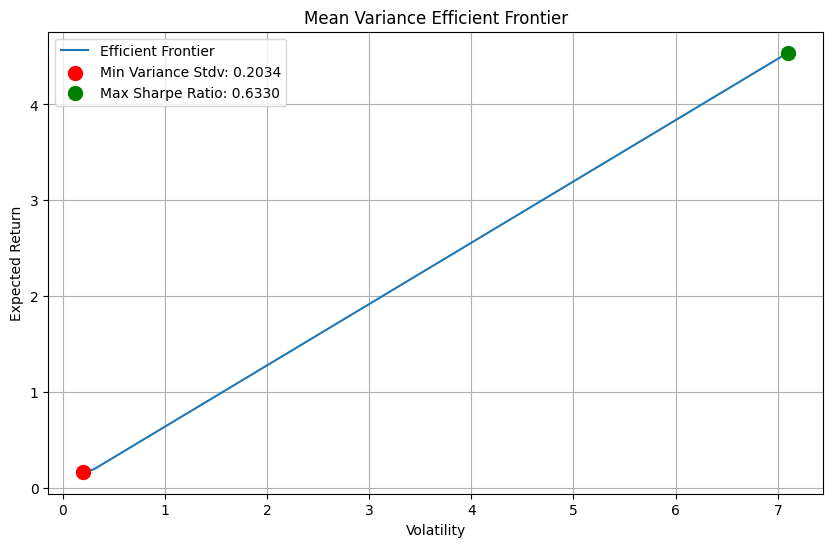

In [27]:
main()